In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime


In [2]:
BA=pd.read_excel('../shared_data_read_only/Business Account.xlsx')

<function matplotlib.pyplot.show(close=None, block=None)>

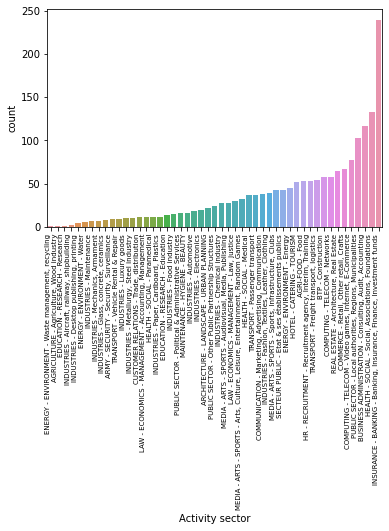

In [3]:

BA['count_sector'] = BA.groupby('Activity sector')['Activity sector'].transform('count')

ax = sns.countplot(x="Activity sector", data=BA.dropna(subset=['Activity sector']).sort_values('count_sector',))

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.tick_params(axis='x', labelsize=7)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

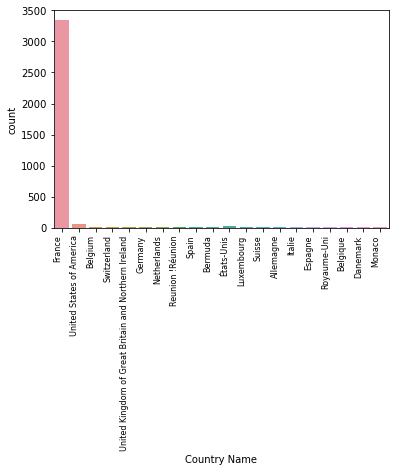

In [4]:
ax = sns.countplot(x="Country Name", data=BA.dropna(subset=['Country Name']))

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.tick_params(axis='x', labelsize=8)
plt.show

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(close=None, block=None)>

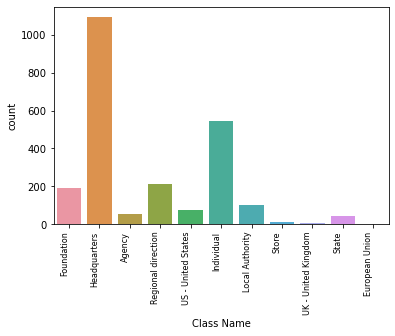

In [5]:
ax = sns.countplot("Class Name", data=BA.dropna(subset=['Class Name']))

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.tick_params(axis='x', labelsize=8)
plt.show

In [6]:
OP = pd.read_excel('../shared_data_read_only/Opportunities.xlsx', index_col=0)


In [7]:
OP_BA = pd.merge(OP, BA, on='Business Account')


In [8]:
OP_BA


,Business Account,Contact ID,Estimated Close Date,Status,Stage,Probability,Estimated amount,Amount received,Difference,Owner Name_x,...,Owner Name_y,Follow-up with_y,Postal Code,City,State,Country ID,Country Name,Created On_y,Last Modified On,count_sector
0,C00037,35334.0,2023-11-27,New,Won,100,9000.00,NaN,-9000.0,3.0,...,29.0,25.0,69001,LYON,NaN,FR,France,2021-02-02 15:35:25.690,2023-10-10 17:02:23.207,11.0
1,C00037,35334.0,2022-11-21,Won,Won,200,8000.00,8000.00,0.0,24.0,...,29.0,25.0,69001,LYON,NaN,FR,France,2021-02-02 15:35:25.690,2023-10-10 17:02:23.207,11.0
2,C00037,NaN,2022-05-31,Won,Won,200,258.28,258.28,0.0,2.0,...,29.0,25.0,69001,LYON,NaN,FR,France,2021-02-02 15:35:25.690,2023-10-10 17:02:23.207,11.0
3,C00037,NaN,2022-05-27,Won,Won,200,500.00,500.00,0.0,2.0,...,29.0,25.0,69001,LYON,NaN,FR,France,2021-02-02 15:35:25.690,2023-10-10 17:02:23.207,11.0
4,C00037,35334.0,2021-10-27,Won,Won,200,8000.00,8000.00,0.0,29.0,...,29.0,25.0,69001,LYON,NaN,FR,France,2021-02-02 15:35:25.690,2023-10-10 17:02:23.207,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5862,C00455,NaN,2020-01-01,Won,Won,100,2000.00,NaN,-2000.0,NaN,...,NaN,NaN,0,Non renseigné,NaN,FR,France,2021-02-02 15:36:59.677,2021-02-18 09:59:09.900,NaN
5863,C00326,NaN,2020-01-01,Won,Won,100,2273.00,NaN,-2273.0,NaN,...,NaN,NaN,0,Non renseigné,NaN,FR,France,2021-02-02 15:36:34.687,2021-02-18 09:58:52.360,NaN
5864,C00298,NaN,2020-01-01,Won,Won,100,2500.00,NaN,-2500.0,NaN,...,NaN,NaN,0,Non renseigné,NaN,FR,France,2021-02-02 15:36:29.683,2023-09-27 14:35:12.283,NaN
5865,C00219,NaN,2020-01-01,Won,Won,100,20000.00,NaN,-20000.0,11.0,...,28.0,24.0,26400,CREST,NaN,FR,France,2021-02-02 15:36:14.830,2023-03-15 14:33:35.810,133.0


In [9]:
OP_BA["Estimated Close Date"] = pd.to_datetime(OP_BA["Estimated Close Date"]).dt.date

OP_BA=OP_BA[(OP_BA['Estimated Close Date']>datetime.date(2021,1,1)) & (OP_BA['Estimated Close Date']<datetime.date(2023,8,1))]  

In [10]:
OP_BA = OP_BA[OP_BA['Estimated amount'] != 0]

In [11]:
OP_BA['Amount received'] = OP_BA['Amount received'].fillna(0)
OP_BA['pourcentage'] = OP_BA['Amount received'] / OP_BA['Estimated amount']
OP_BA.groupby('Stage')['pourcentage'].mean()

Stage
Advanced Prospect    0.214286
Dossier posed        0.265060
Initial Prospect     0.309352
Lost                 0.000000
Oral agreement       0.436504
Won                  0.779369
Name: pourcentage, dtype: float64

In [12]:
z = OP_BA['Activity sector'].value_counts()

z1 = z.to_dict() #converts to dictionary

OP_BA['Sector_count'] = OP_BA['Activity sector'].map(z1) 

OP_BA.groupby(by='Activity sector')['pourcentage','Sector_count'].mean().sort_values(by='Sector_count', ascending=False)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,pourcentage,Sector_count
Activity sector,,
"INSURANCE - BANKING - Banking, Insurance, Finance, Investment funds",0.729723,472.0
"PUBLIC SECTOR - Local authorities, Regions, Municipalities",0.592489,197.0
"HEALTH - SOCIAL - Social, Associations, Foundations",0.669513,161.0
SECTEUR PUBLIC - Etat & ses établissements publics,0.711905,120.0
"BUSINESS ADMINISTRATION - Consulting, Audit, Accounting",0.731197,119.0
BTP - Construction,0.758293,113.0
"COMMERCE - Retail, Other retail, Crafts",0.759134,105.0
AGRI-FOOD - Food,0.756401,99.0
"TRANSPORT - Freight transport, logistics",0.832609,92.0


In [13]:
z = OP_BA['Class Name'].value_counts()

z1 = z.to_dict() #converts to dictionary

OP_BA['Class_count'] = OP_BA['Class Name'].map(z1) 

OP_BA.groupby('Class Name')['pourcentage','Class_count'].mean().sort_values(by='Class_count', ascending=False)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,pourcentage,Class_count
Class Name,,
Headquarters,0.793539,1548.0
Individual,0.267463,837.0
Foundation,0.680303,384.0
Regional direction,0.711736,258.0
Local Authority,0.567850,158.0
State,0.717069,154.0
Agency,0.769231,65.0
US - United States,0.714794,52.0
UK - United Kingdom,0.750000,8.0


In [14]:
OP_BA.groupby('Class Name')['Amount received'].sum().sort_values(ascending=False)

Class Name
Headquarters           17687234.36
Foundation             13573761.98
State                   7848876.18
Local Authority         4974131.97
Regional direction      1558135.32
Individual               531580.65
US - United States       436213.89
Agency                   243396.19
Store                     57007.00
UK - United Kingdom       38447.82
Name: Amount received, dtype: float64

In [15]:
OP_BA.groupby('Activity sector')['Amount received'].sum().sort_values(ascending=False)

Activity sector
INSURANCE - BANKING - Banking, Insurance, Finance, Investment funds            8646647.14
SECTEUR PUBLIC - Etat & ses établissements publics                             6513391.22
HEALTH - SOCIAL - Social, Associations, Foundations                            6359045.82
PUBLIC SECTOR - Local authorities, Regions, Municipalities                     6325616.93
INDUSTRIES - Fashion, Textiles, Leather, Clothing                              1859974.45
AGRI-FOOD - Food                                                               1463885.28
COMPUTING - TELECOM - Video games, Internet, E-Commerce                        1337066.29
COMPUTING - TELECOM - Networks                                                 1226048.32
BTP - Construction                                                             1225994.25
INDUSTRIES - Food industry                                                      986173.67
MEDIA - ARTS - SPORTS - Sports, Infrastructure, Clubs                           9667

                                       pourcentage
Class Name          Stage                         
Agency              Initial Prospect      0.000000
                    Oral agreement        0.250000
                    Won                   0.875000
Foundation          Advanced Prospect     0.071429
                    Dossier posed         0.040000
                    Initial Prospect      0.033333
                    Lost                  0.000000
                    Oral agreement        0.627829
                    Won                   0.871398
Headquarters        Advanced Prospect     0.047619
                    Dossier posed         0.652174
                    Initial Prospect      0.281250
                    Lost                  0.000000
                    Oral agreement        0.645114
                    Won                   0.871374
Individual          Advanced Prospect     0.000000
                    Initial Prospect      0.000000
                    Oral agreem

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Stage', ylabel='Class Name'>

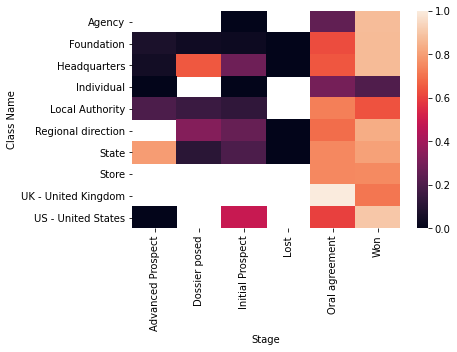

In [16]:

df=OP_BA.groupby(['Class Name', 'Stage'])['Class Name', 'Stage','pourcentage'].mean()
print(df)
table=pd.pivot_table(df, values='pourcentage', index=['Class Name'], columns=['Stage'])
sns.heatmap(table)


In [22]:
clean_training_data=OP_BA[['Class Name', 'Stage', 'Activity sector', 'Class ID', 'pourcentage']]

In [43]:
clean_training_data['pourcentage']=clean_training_data['pourcentage'].round(0)
clean_traing_data=clean_training_data.where(clean_training_data['pourcentage']<2)


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
dummified = pd.get_dummies(clean_training_data, columns=['Class Name', 'Activity sector', 'Class ID', 'Stage'])

In [45]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [46]:
X= dummified.loc[:, dummified.columns != 'pourcentage']

In [47]:
y = dummified['pourcentage']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
y_pred = rf.predict(X_test)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8177278401997503


In [52]:
cm = confusion_matrix(y_test, y_pred)

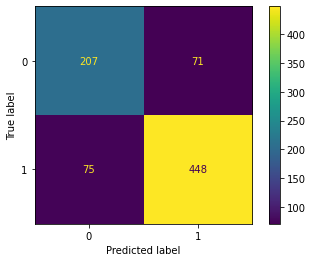

In [53]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot();